In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('uber.csv')

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


Cleaning the data

In [ ]:
df.shape

(62527, 9)

In [ ]:
df.dropna(inplace=True)
df.drop(['key','Unnamed: 0'], axis=1,inplace=True)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<ipython-input-7-5eb53adc2a15>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="Blues", annot=True)


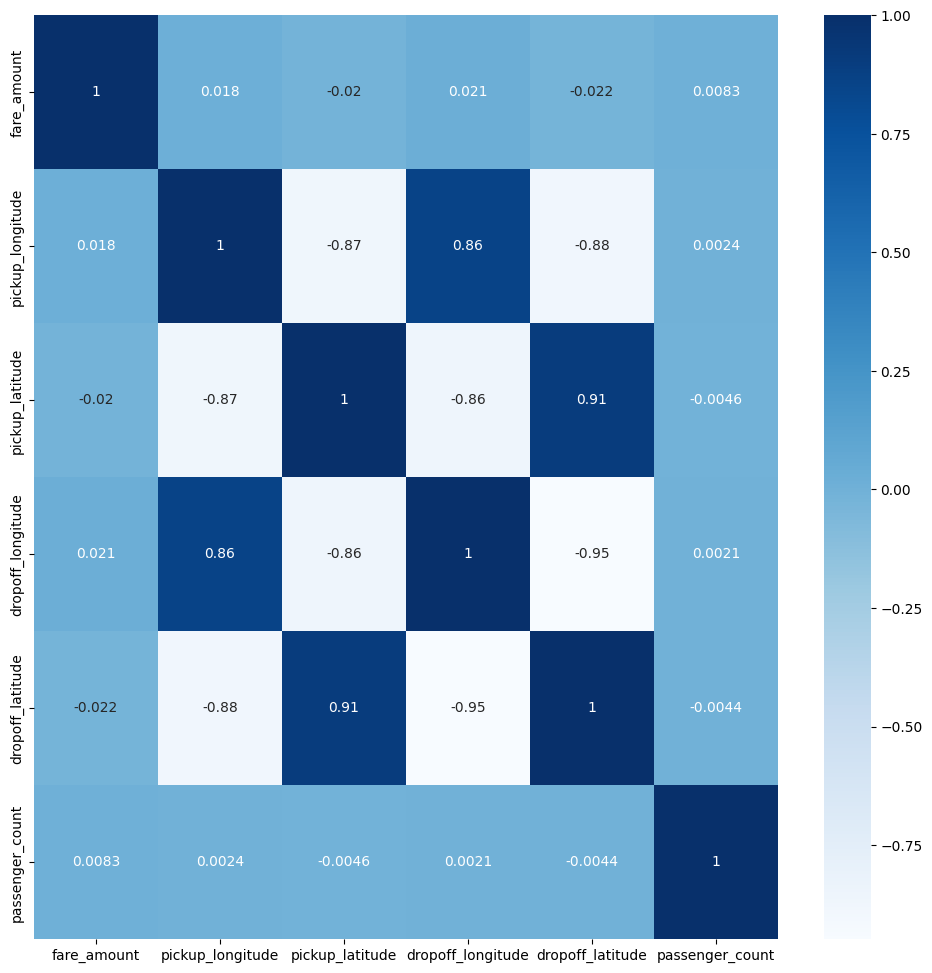

In [ ]:
#correlation between coefficients

plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

> Finding distance between pickoff - dropoff



In [ ]:
df=df[(abs(df['pickup_latitude'])<90)& (abs(df['dropoff_latitude'])<90)]

In [ ]:
df.shape

(62524, 7)

In [ ]:
#Using python library Geopy

from geopy.distance import geodesic
from geopy.distance import distance

In [ ]:
#Convert df to list

pick_lat = df['pickup_latitude'].to_list()
pick_long=df['pickup_longitude'].to_list()
drop_lat=df['dropoff_latitude'].to_list()
drop_long=df['dropoff_longitude'].to_list()

In [ ]:
#Create new list distances

distances=[]
for i in range(len(drop_lat)):
  pickup=(pick_lat[i],pick_long[i])
  drop=(drop_lat[i],drop_long[i])
  distance=geodesic(pickup,drop).km
  distances.append(distance)


In [ ]:
#Create a dataframe

Distance=pd.DataFrame(distances)

In [ ]:
Distance['Distance in kms']=pd.DataFrame(distances)

In [ ]:
df['Distances in kms']=Distance['Distance in kms']

Text(0, 0.5, 'fare_amount')

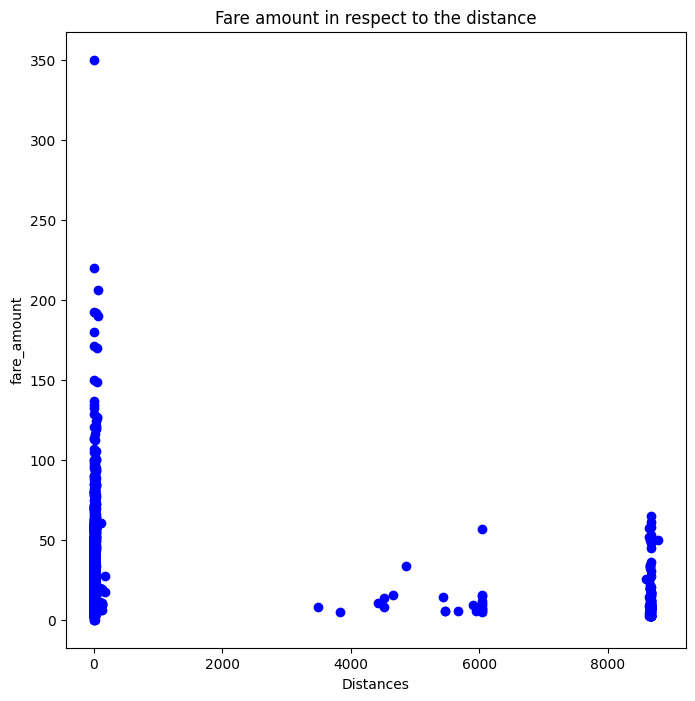

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['Distances in kms'],df['fare_amount'],c='blue')
plt.title('Fare amount in respect to the distance')
plt.xlabel('Distances')
plt.ylabel('fare_amount')

In [ ]:
#create a function for distance calculation between the two locations latitudes and logitudes
from math import radians, cos, sin, asin, sqrt
def calculate_distance(lat1, lat2, lon1, lon2):

	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)

	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))

	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371

	# calculate the result
	return(c * r)

In [ ]:

#extract the time out of date and bin it to the morning, afternoon, evening, night
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime,utc=True)

df['pickup_timehour']= df['pickup_datetime'].apply(lambda x: x.hour)
df['Day']= df['pickup_datetime'].dt.day_name()
df['Day Part']= pd.cut(df['pickup_timehour'],bins=[-1,4,12,17,21,23],labels=['Night','Morning','Afternoon','Evening','Night'],ordered=False)
df['pickup_month']= df['pickup_datetime'].apply(lambda x: x.month)
df['pickup_year']= df['pickup_datetime'].apply(lambda x: x.year)
df['distance_travelled (KM)']= df.apply(lambda x:  calculate_distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)



In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distances in kms,pickup_timehour,Day,Day Part,pickup_month,pickup_year,distance_travelled (KM)
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.681111,19,Thursday,Evening,5,2015,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.454363,20,Friday,Evening,7,2009,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.039603,21,Monday,Evening,8,2009,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661442,8,Friday,Morning,6,2009,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.483730,17,Thursday,Afternoon,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62521,10.5,2012-10-31 10:04:52+00:00,-73.954478,40.765868,-73.948091,40.787190,1.0,4.810296,10,Wednesday,Morning,10,2012,2.431131
62522,9.5,2015-02-03 20:14:56+00:00,-73.980125,40.742516,-74.001640,40.740215,1.0,0.571784,20,Tuesday,Evening,2,2015,1.830551
62523,10.5,2012-02-02 05:57:00+00:00,-73.949597,40.782017,-73.984855,40.747992,1.0,3.188062,5,Thursday,Morning,2,2012,4.809505
62524,4.0,2015-01-26 17:34:42+00:00,-73.949532,40.802330,-73.943878,40.799492,1.0,NaN,17,Monday,Afternoon,1,2015,0.570998


Doing EDA

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distances in kms,pickup_timehour,pickup_month,pickup_year,distance_travelled (KM)
count,62524.000000,62524.000000,62524.000000,62524.000000,62524.000000,62524.000000,62522.000000,62524.000000,62524.000000,62524.000000,62524.000000
mean,11.429363,-72.538873,39.926078,-72.550277,39.934647,1.676780,21.641812,13.463806,6.272183,2011.745554,21.635960
std,10.037125,11.074031,6.138764,10.664017,6.111773,1.296607,390.248614,6.532341,3.440878,1.860251,390.173296
min,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000,0.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992086,40.734735,-73.991462,40.733613,1.000000,1.222297,9.000000,3.000000,2010.000000,1.221893
50%,8.500000,-73.981831,40.752491,-73.980125,40.752942,1.000000,2.132134,14.000000,6.000000,2012.000000,2.131594
75%,12.712500,-73.967175,40.767112,-73.963705,40.768169,2.000000,3.902804,19.000000,9.000000,2013.000000,3.904394
max,350.000000,40.808425,45.031653,40.828377,45.031598,6.000000,8776.815279,23.000000,12.000000,2015.000000,8776.106279


In [ ]:
#remove the latitude and longitude ===000, passenger_count=0, fare<=0

df=df[~((df['pickup_latitude']==0.000000)&(df['pickup_longitude']==0.000000))]
print(f'After dropping the data, the final shape is {df.shape}')

After dropping the data, the final shape is (61365, 14)


In [ ]:
df=df[~(df['fare_amount']<=0)]
df=df[~(df['passenger_count']==0)]
print(f'After dropping the data, the final shape is {df.shape}')

After dropping the data, the final shape is (61145, 14)


In [ ]:
df=df[~(df['passenger_count']==208)]
print(f'After dropping the data, the final shape is {df.shape}')

After dropping the data, the final shape is (61145, 14)


<Axes: xlabel='Distances in kms'>

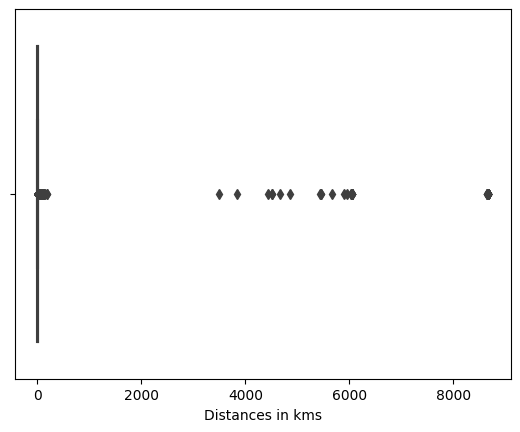

In [ ]:
sns.boxplot(x=df['Distances in kms'])

In [ ]:
#let's put a threshold for distance above 500 km as not possible
df= df[df['Distances in kms']<=50]

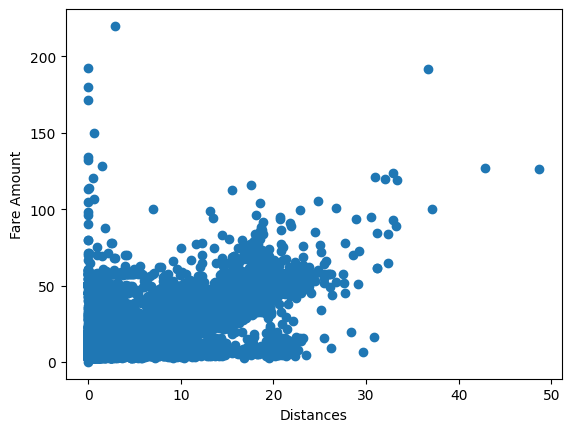

In [ ]:
plt.scatter(df['Distances in kms'],df['fare_amount'])
plt.xlabel('Distances')
plt.ylabel('Fare Amount')
plt.show()

Plot becomes much easier to understand.

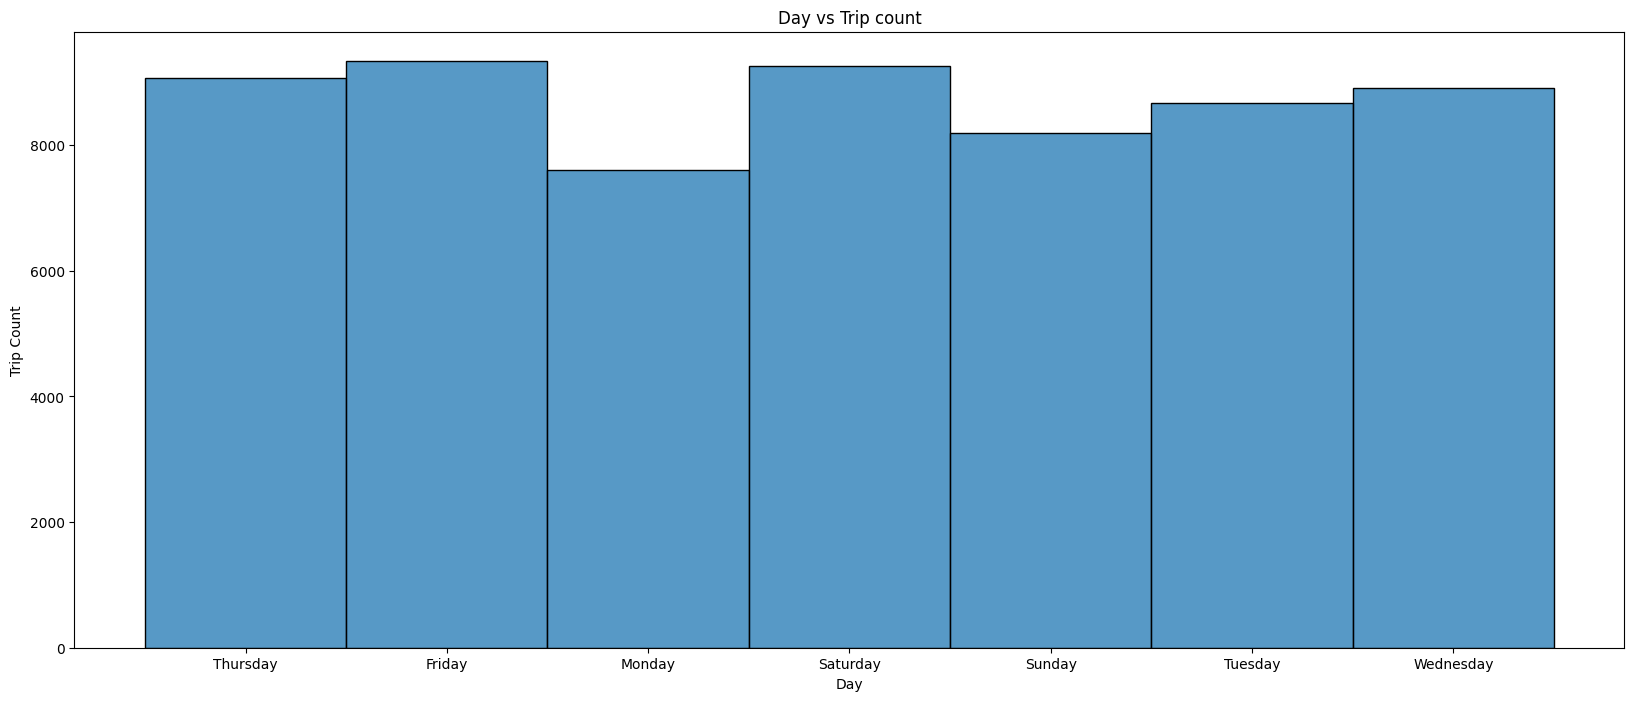

In [ ]:
#day wise study
plt.figure(figsize=(20,8))
sns.histplot(df['Day'])
plt.ylabel('Trip Count')
plt.title('Day vs Trip count')
plt.show()

**Insight**
`Uber has more trips on friday and lowest on monday.`

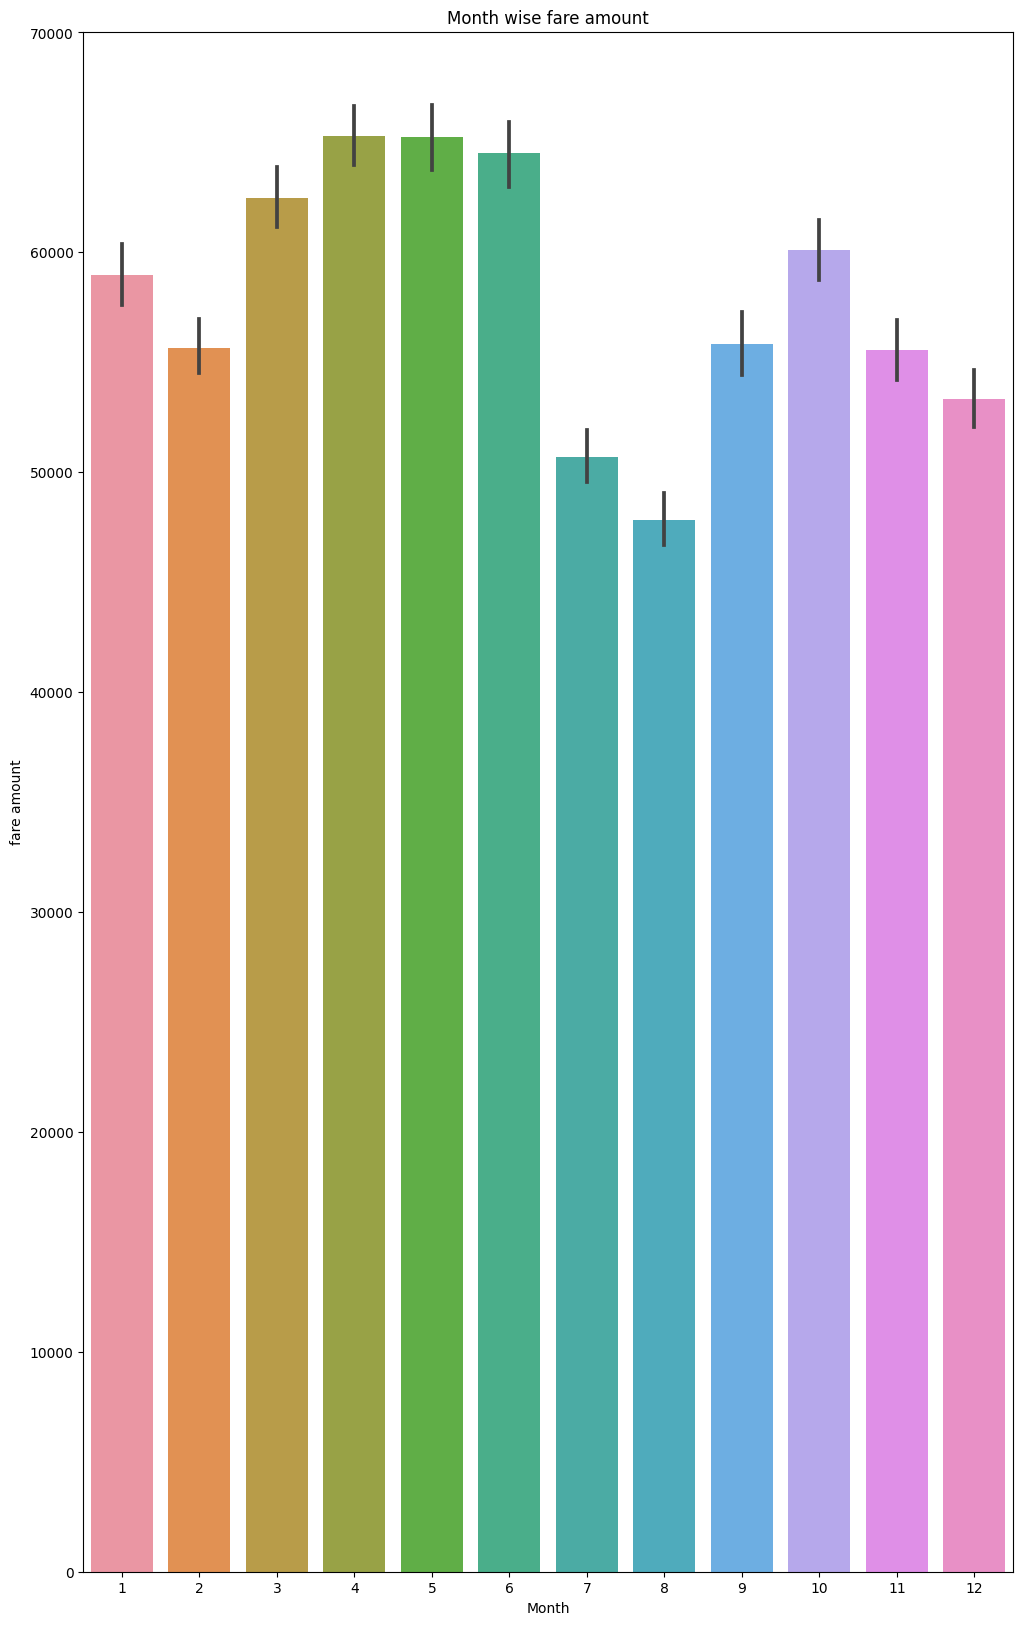

In [ ]:
#month wise fare study
plt.figure(figsize=(12,20))
plt.title('Month wise fare amount')
sns.barplot(x=df['pickup_month'],y=df['fare_amount'],estimator=sum)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

Feature Selection

In [ ]:
df1 = df.copy()

In [ ]:
X= df.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_timehour','fare_amount'],axis=1)
y = df['fare_amount']

In [ ]:
df_temp= pd.get_dummies(df[['Day','Day Part']],drop_first=True)
df = pd.concat([df,df_temp],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distances in kms,pickup_timehour,Day,...,distance_travelled (KM),Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Day Part_Evening,Day Part_Morning,Day Part_Night
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.681111,19,Thursday,...,1.683323,0,0,0,1,0,0,1,0,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.454363,20,Friday,...,2.457590,0,0,0,0,0,0,1,0,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.039603,21,Monday,...,5.036377,1,0,0,0,0,0,1,0,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661442,8,Friday,...,1.661683,0,0,0,0,0,0,0,1,0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.483730,17,Thursday,...,4.475450,0,0,0,1,0,0,0,0,0


In [ ]:
df.drop(['Day','Day Part'],axis=1,inplace=True)

In [ ]:
X= df.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_timehour','fare_amount'],axis=1)
y = df['fare_amount']
X_1=X.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split
#X_1=sm.add_constant(X_1)
X_train,X_test,y_train,y_test= train_test_split(X_1,y,test_size=0.3,random_state=100)
X_train['Distances in kms']=scaler.fit_transform(X_train['Distances in kms'].values.reshape(-1,1))
X_test['Distances in kms'] = scaler.transform(X_test['Distances in kms'].values.reshape(-1,1))

In [ ]:
X_train.describe()

,passenger_count,Distances in kms,pickup_month,pickup_year,distance_travelled (KM),Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Day Part_Evening,Day Part_Morning,Day Part_Night
count,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000,42730.000000
mean,1.678984,0.068326,6.271963,2011.739270,4.549249,0.125532,0.152282,0.133185,0.146197,0.142546,0.147508,0.239363,0.299017,0.224971
std,1.289386,0.073906,3.444122,1.866487,97.046883,0.331326,0.359298,0.339779,0.353308,0.349614,0.354615,0.426700,0.457833,0.417568
min,1.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.025847,3.000000,2010.000000,1.260618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.044587,6.000000,2012.000000,2.172860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.080778,9.000000,2013.000000,3.943077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,1.000000,12.000000,2015.000000,8666.605002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
